# Talbot Effect on Two-Sphere

Linear Schrodinger
        $$\left\{\begin{matrix}
            &iu_t+u_{xx}=0\text{ (1)} \\ 
            &u(x,0)=g(x),\text{ (2)} 
        \end{matrix}\right.$$ where $u$ has $2\pi$ period in $x$. $g(x)$ is the initial data, which is also $2\pi$ periodic. Starting with Fourier Series $g:\mathbb{R}\rightarrow \mathbb{C}$ ($2\pi$ periodic)
        \begin{align*}
            g(x)=\sum^{\infty}_{n=-\infty}a_ne^{inx},\quad a_n=\hat{g}(n)=\frac{1}{2\pi}\int_{0}^{2\pi}g(x)e^{-inx}dx,
        \end{align*}
        we try different parameters for $u(x,t)=\sum^{\infty}_{n=-\infty}a_n(t)e^{inx}$

Define the first initial function, make a sample matrix, and plot the graph}
Sampling matrix: The sampling matrix is an $N\times 2N$ sampling matrix of the initial function values that the program uses to calculate approximate Fourier coefficients.\
Our first initial function is:\
$ \chi_{[a, b]}(y) = \left\{\begin{matrix}
            &1 \text{ if } y \in [a, b]\\ 
            &0 \text{ else } 
        \end{matrix}\right.\qquad f(x) = \chi_{[a, b]}(\phi)\chi_{[c, d]}(\theta)$\
Then the real part of the solution should be:
\begin{align*}
    \Re (u(\phi, \theta ,t))=\sum^{\infty}_{n=-\infty}\sum^{\lvert n \rvert}_{k=-\lvert n \rvert} a_{n, k} cos(tn(n+1)) Y^{n,k}
\end{align*}
and we should try different t values. 

In [88]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyshtools as pyshtools
from sklearn.linear_model import LinearRegression

In [29]:
def initial_matrix(N: int, phi_1: float, phi_2: float, theta_1: float, theta_2: float):
    # the initial rectangle area on the spherical coordinte is pi * 2pi
    output = np.zeros((N, 2*N))
    # phi and theta should in pi * 2pi
    if(phi_1 > 2*np.pi or phi_2 > 2*np.pi or theta_1 > np.pi or theta_2 > np.pi):
        raise ValueError("out of bound")
        
    if(phi_1 > phi_2):
        raise ValueError("phi_1 should be smaller than phi_2") 
    if(theta_1 > theta_2):
        raise ValueError("theta_1 should be smaller than theta_2")  
        
    a_1 = int(N * theta_1 / np.pi)
    a_2 = int(N * theta_2 / np.pi)
    b_1 = int(N * phi_1 / (2 * np.pi))
    b_2 = int(N * phi_2 / (2 * np.pi))
    
    output[a_1:a_2, b_1:b_2] = 1
    
    return output

In [30]:
agrid = initial_matrix(1000, 1, 2, 1, 2)
grid = pyshtools.SHGrid.from_array(agrid)

In [31]:
clm = grid.expand()

In [32]:
from pyshtools.shtools import SHExpandDH, MakeGridDH

In [33]:
coeffs = clm.to_array()

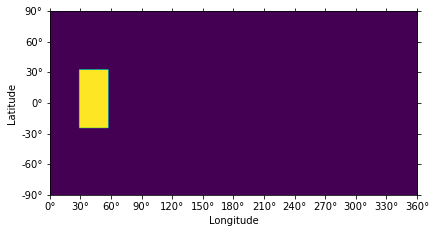

In [34]:
fig, ax = grid.plot(show=False)

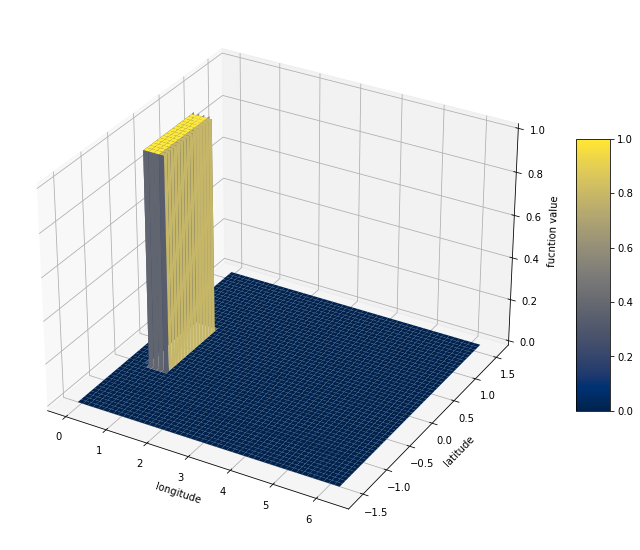

In [35]:
grid_array = grid.to_array()
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

grid_array = grid.to_array()
x = np.arange(0, 2*np.pi, 2*np.pi/2000)
y = np.arange(-np.pi / 2, np.pi / 2, np.pi/1000)
Z = grid_array
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('fucntion value')

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

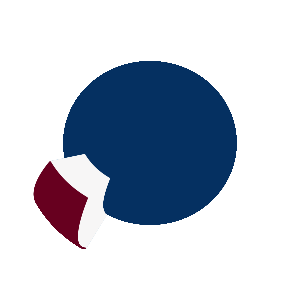

In [50]:
fig, ax = grid.plot3d(cmap='RdBu_r',
                      elevation=60,
                      azimuth=90,
                      scale=2,
                      cmap_limits=[0, 1.0],
                      show=False)

## Try different t-values

Calculate the Fourier Coefficients $a_{n,k}$ of the function's real part by multiplying every entry of the initial coefficients by $cos(t(n)(n+1))$

In [37]:
def change_t(odd_coeffs: np.ndarray, t: int) -> np.ndarray:
    new_coeffs = odd_coeffs
    row = len(odd_coeffs[0])
    column = len(odd_coeffs[0][0])
    for k in range(0, 2):
        for i in range(row):
            for j in range(column):
                new_coeffs[k][i][j] = odd_coeffs[k][i][j] * np.cos(t * i * (i+1))
    return new_coeffs

### t = π / 10

In [38]:
new_coeffs_1 = change_t(coeffs, np.pi / 10)

In [39]:
## new SHCoeffs class from the new matrix 
new_SHCoeffs_class_1 = pyshtools.SHCoeffs.from_array(new_coeffs_1)

In [40]:
new_grid_1 = new_SHCoeffs_class_1.expand()

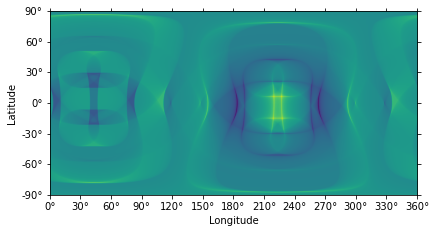

In [41]:
fig, ax = new_grid_1.plot(show=False)

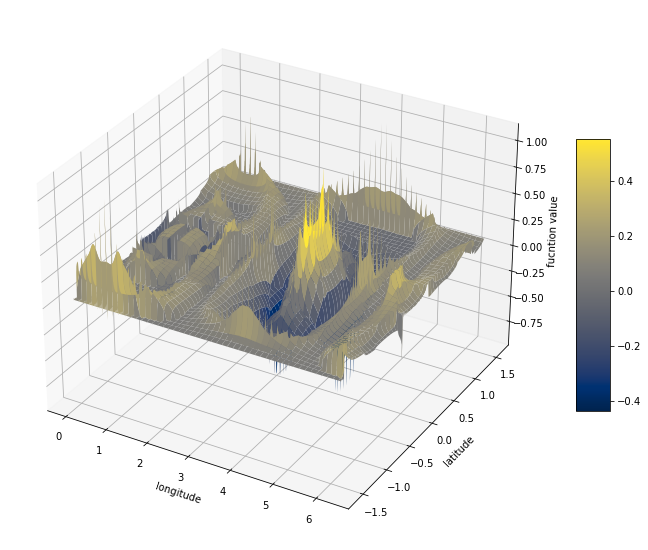

In [14]:
grid_array_1 = new_grid_1.to_array()
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(0, 2*np.pi, 2*np.pi/4001)
y = np.arange(-np.pi / 2, np.pi / 2, np.pi/2001)
Z = grid_array_1
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('fucntion value')

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

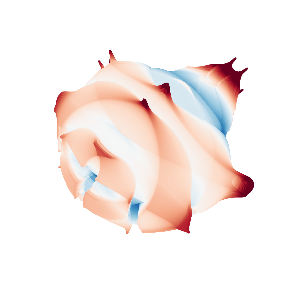

In [42]:
fig, ax = new_grid_1.plot3d(cmap= 'RdBu_r',
                      elevation=60,
                      azimuth=90,
                      scale=2,
                      cmap_limits=[-0.43, .5],
                      show=False)

### t = pi**2 / 10

In [43]:
new_coeffs_2= change_t(coeffs, np.pi**2 / 10)
new_SHCoeffs_class_2 = pyshtools.SHCoeffs.from_array(new_coeffs_2)
new_grid_2 = new_SHCoeffs_class_2.expand()

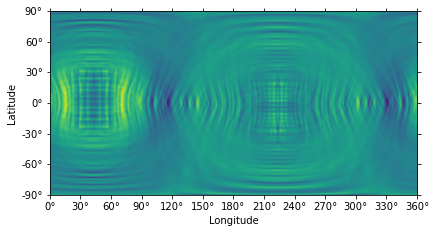

In [50]:
fig_1, ax_1 = new_grid_2.plot(show=False)

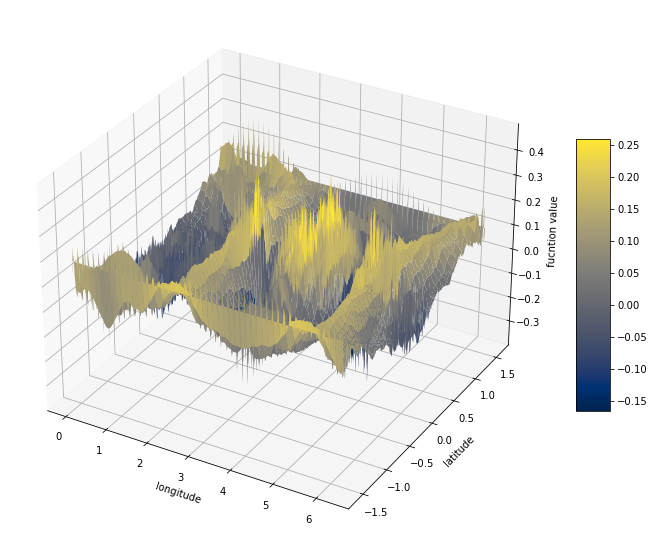

In [19]:
grid_array_2 = new_grid_2.to_array()
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(0, 2*np.pi, 2*np.pi/4001)
y = np.arange(-np.pi / 2, np.pi / 2, np.pi/2001)
Z = grid_array_2
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('fucntion value')

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

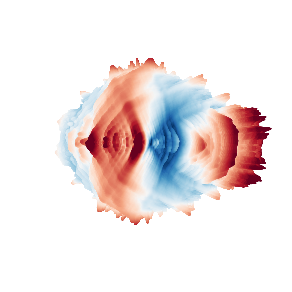

In [59]:
fig_1, ax_1 = new_grid_2.plot3d(cmap='RdBu_r',
                      elevation=0,
                      azimuth=150,
                      cmap_limits=[-0.17, 0.29],
                      scale = 2,
                      show=False)

### t = √2 * pi / 10

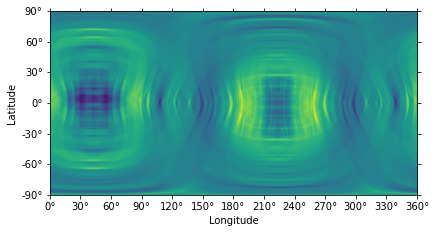

In [21]:
new_coeffs_3= change_t(coeffs, np.sqrt(2) * np.pi / 10)
new_SHCoeffs_class_3 = pyshtools.SHCoeffs.from_array(new_coeffs_3)
new_grid_3 = new_SHCoeffs_class_3.expand()
fig_1, ax_1 = new_grid_3.plot(show=False)

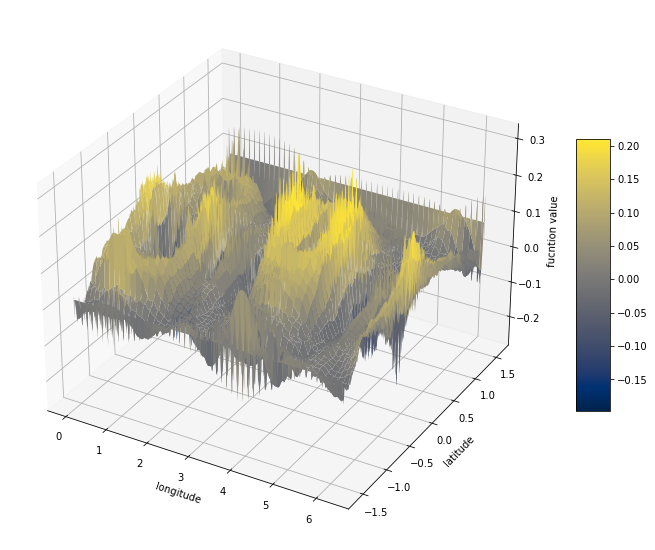

In [22]:
grid_array_3 = new_grid_3.to_array()
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(0, 2*np.pi, 2*np.pi/4001)
y = np.arange(-np.pi / 2, np.pi / 2, np.pi/2001)
Z = grid_array_3
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('fucntion value')

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

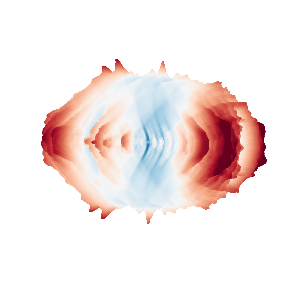

In [60]:
fig_1, ax_1 = new_grid_3.plot3d(cmap='RdBu_r',
                      elevation=0,
                      azimuth=150,
                      cmap_limits=[-0.2, 0.25],
                      scale = 2,
                      show=False)

### t = e * π / 10

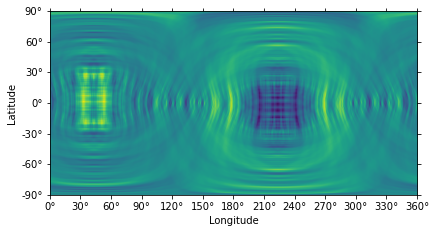

In [56]:
new_coeffs_4 = change_t(coeffs, np.exp(1) * np.pi / 10)
new_SHCoeffs_class_4 = pyshtools.SHCoeffs.from_array(new_coeffs_4)
new_grid_4 = new_SHCoeffs_class_4.expand()
fig_1, ax_1 = new_grid_4.plot(show=False)

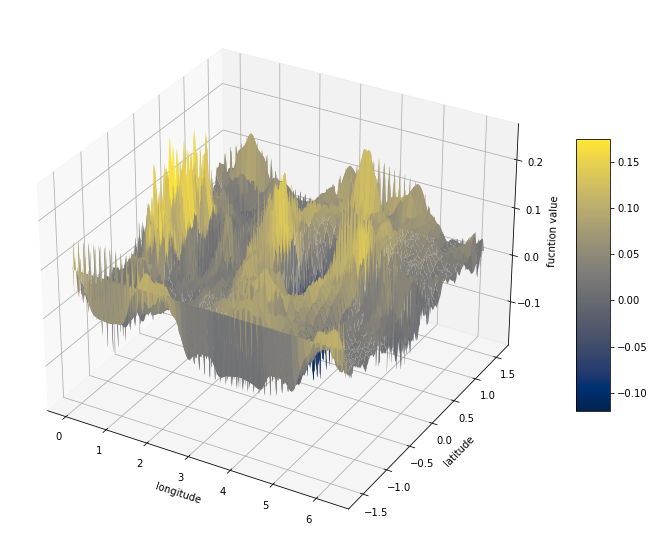

In [58]:
grid_array_4 = new_grid_4.to_array()
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(0, 2*np.pi, 2*np.pi/2001)
y = np.arange(-np.pi / 2, np.pi / 2, np.pi/1001)
Z = grid_array_4
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('fucntion value')

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

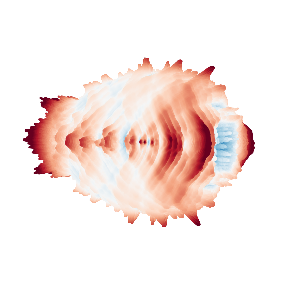

In [62]:
fig_1, ax_1 = new_grid_4.plot3d(cmap='RdBu_r',
                      elevation=0,
                      azimuth=150,
                      cmap_limits=[-0.15, 0.2],
                      scale = 2,
                      show=False)

## Try a Different Initial Function

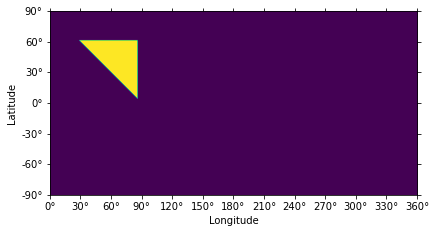

In [65]:
agrid = initial_matrix(1000, 0.5, 3, 0.5, 3)
agrid_2 = np.triu(agrid)
grid_2 = pyshtools.SHGrid.from_array(agrid_2)
clm_2 = grid_2.expand()
# fig, ax = clm_2.plot_spectrum(show=False) 
fig, ax = grid_2.plot(show=False)
coeffs_2 = clm_2.to_array()

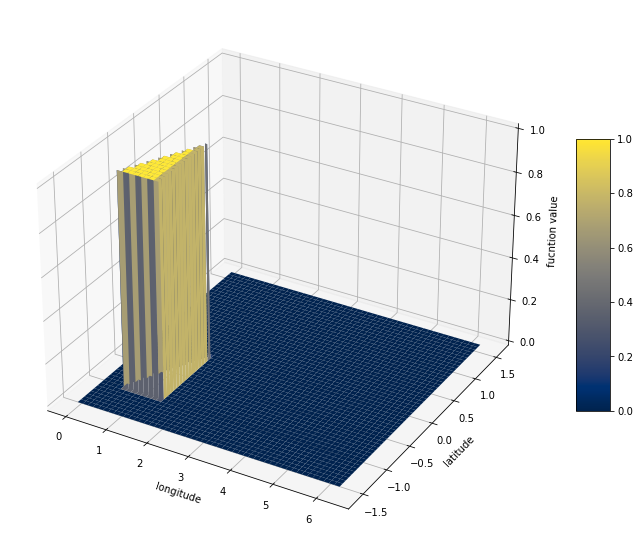

In [34]:
grid2_array = grid_2.to_array()
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(0, 2*np.pi, 2*np.pi/2000)
y = np.arange(-np.pi / 2, np.pi / 2, np.pi/1000)
Z = grid2_array
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('fucntion value')

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

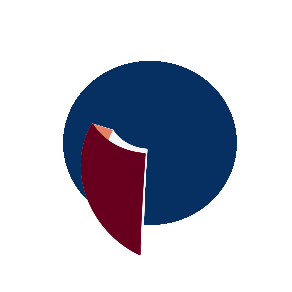

In [66]:
fig, ax = grid_2.plot3d(cmap='RdBu_r',
                      elevation=60,
                      azimuth=90,
                      scale=2,
                      cmap_limits=[0, 1],
                      show=False)

## Try different t-values for the new initial function

### t = π / 10

In [67]:
new_coeffs_5 = change_t(coeffs_2, np.pi / 10)
new_SHCoeffs_class_5 = pyshtools.SHCoeffs.from_array(new_coeffs_5)
new_grid_5 = new_SHCoeffs_class_5.expand()

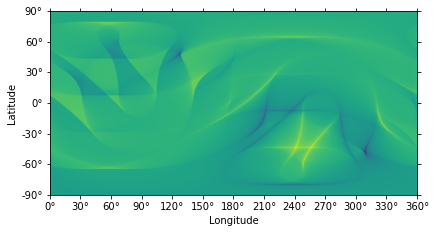

In [68]:
fig_1, ax_1 = new_grid_5.plot(show=False)

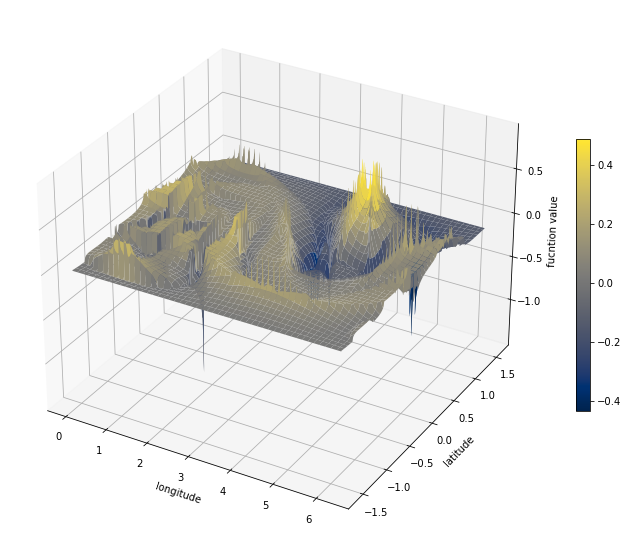

In [69]:
grid_array_5 = new_grid_5.to_array()
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(0, 2*np.pi, 2*np.pi/2001)
y = np.arange(-np.pi / 2, np.pi / 2, np.pi/1001)
Z = grid_array_5
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('fucntion value')

fig.colorbar(surf, shrink=0.5, aspect=20)

plt.show()

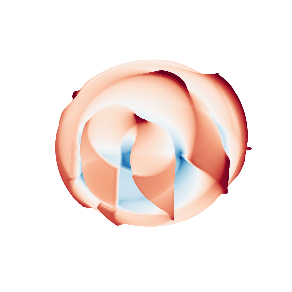

In [70]:
fig, ax = new_grid_5.plot3d(cmap = 'RdBu_r',
                            elevation=60,
                            azimuth=90,
                            scale=2,
                            cmap_limits=[-0.42, 0.43],
                            show=False)

## t = π^2 / 10

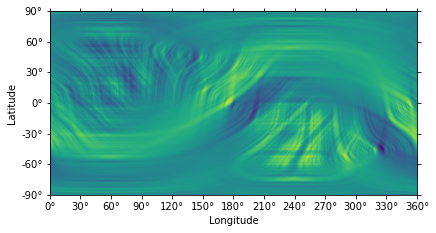

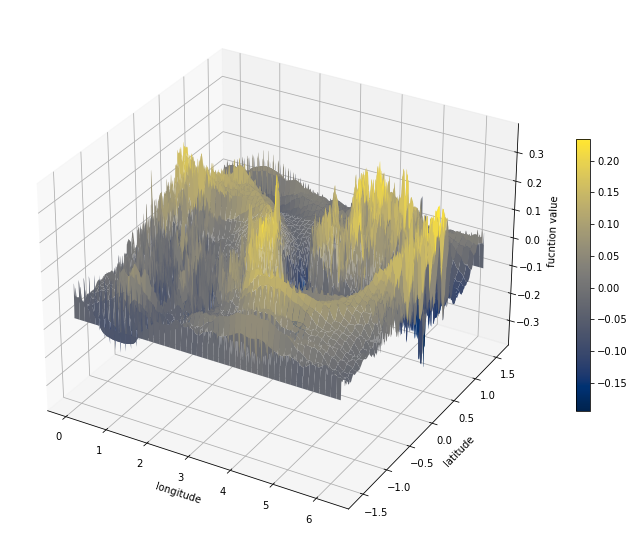

In [71]:
new_coeffs_6 = change_t(coeffs_2, np.pi**2 / 10)
new_SHCoeffs_class_6 = pyshtools.SHCoeffs.from_array(new_coeffs_6)
new_grid_6 = new_SHCoeffs_class_6.expand()
fig_1, ax_1 = new_grid_6.plot(show=False)

grid_array_6 = new_grid_6.to_array()

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(0, 2*np.pi, 2*np.pi/2001)
y = np.arange(-np.pi / 2, np.pi / 2, np.pi/1001)
Z = grid_array_6
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('fucntion value')

fig.colorbar(surf, shrink=0.5, aspect=20)

plt.show()

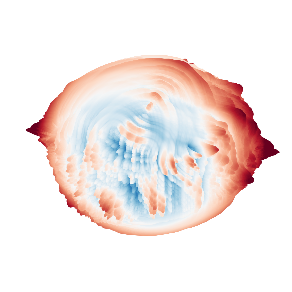

In [72]:
fig, ax = new_grid_6.plot3d(cmap = 'RdBu_r',
                      elevation=60,
                      azimuth=90,
                      scale=2,
                      cmap_limits=[-0.2, 0.25],
                      show=False)

## t = e * π / 10

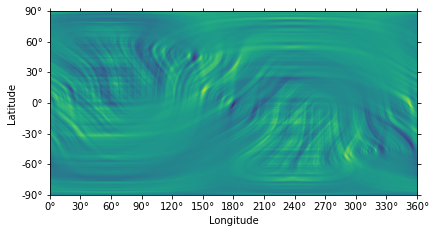

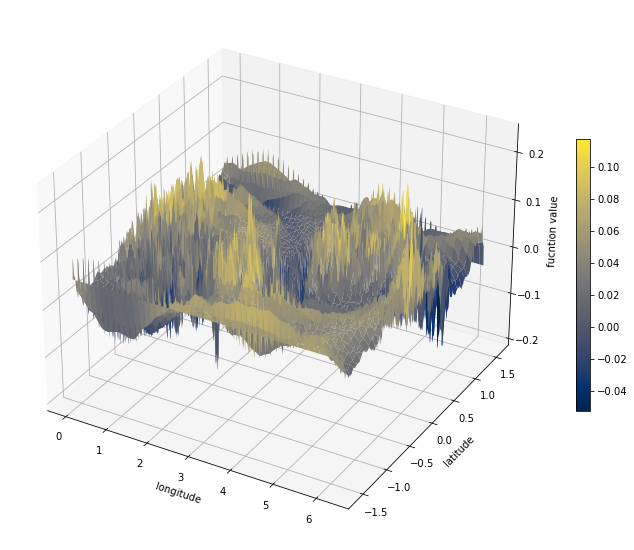

In [107]:
new_coeffs_7 = change_t(coeffs_2, np.pi * np.exp(1) / 10)
new_SHCoeffs_class_7 = pyshtools.SHCoeffs.from_array(new_coeffs_7)
new_grid_7 = new_SHCoeffs_class_7.expand()
fig_1, ax_1 = new_grid_7.plot(show=False)

grid_array_7 = new_grid_7.to_array()

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(0, 2*np.pi, 2*np.pi/2001)
y = np.arange(-np.pi / 2, np.pi / 2, np.pi/1001)
Z = grid_array_7
X, Y = np.meshgrid(x, y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('fucntion value')

fig.colorbar(surf, shrink=0.5, aspect=20)

plt.show()

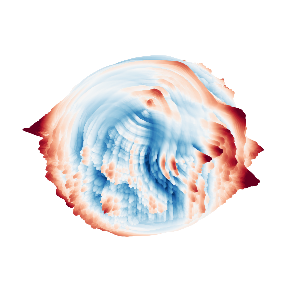

In [120]:
fig, ax = new_grid_7.plot3d(cmap='RdBu_r',
                      elevation=60,
                      azimuth=90,
                      scale=2,
                      cmap_limits=[-0.045, 0.15],
                      show=False)

## Counting Box-Dimension

Box-Counting Dimension: Box-Counting Dimension of a bounded set E is given by
    $$
        \overline{\text{dim}}{\text{E}} = \lim\limits_{\epsilon \to 0} \frac{\log (N(\epsilon))}{\log \frac{1}{\epsilon}}
    $$
We use the smallest number of boxes to cover the whole surface, where the boxes have length $\epsilon$.
To approximate this process, for each column of boxes we used to cover the part of the surface, we can find the maximum value and minimum value in the region and find its difference, then we divide it by $\epsilon$ to find the approximate number of boxes need to cover part of the surface. Finally, we sum those numbers together.

### t = π / 10, sample size = 5000

In [74]:
initial_grid = pyshtools.SHGrid.from_array(initial_matrix(5000, 1, 2, 1, 2))
initial_grid_array = initial_grid.to_array()
coeff = initial_grid.expand().to_array()
new_coeff = change_t(coeff, np.pi / 10)
new_coeff_class = pyshtools.SHCoeffs.from_array(new_coeff)
value_matrix = new_coeff_class.expand().to_array()

[[0.04739356 0.04739356 0.04739356 ... 0.04739356 0.04739356 0.04739356]
 [0.05023657 0.05023951 0.05024245 ... 0.05023069 0.05023363 0.05023657]
 [0.0554426  0.0554477  0.0554528  ... 0.05543236 0.05543749 0.0554426 ]
 ...
 [0.11033397 0.11033714 0.1103403  ... 0.11032766 0.11033082 0.11033397]
 [0.11001143 0.11000971 0.11000799 ... 0.11001489 0.11001316 0.11001143]
 [0.11498747 0.11498747 0.11498747 ... 0.11498747 0.11498747 0.11498747]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [93]:
from tqdm import tqdm
def matrix_difference(matrix, N):
    small_box_length = (N-1)*np.pi / 5000
    rows, cols = matrix.shape
    num_of_boxes = 0
    for i in tqdm(range(0, rows, N-1)):
        for j in range(0, cols, N-1):
            submatrix = matrix[i:i + N, j:j + N]
            min_value = np.min(submatrix)
            max_value = np.max(submatrix)
            difference = np.ceil((max_value - min_value) / small_box_length)
            num_of_boxes += difference
    return np.log(num_of_boxes), np.log(1/small_box_length)

In [94]:
x = []
y = []
for N in [4, 5, 10, 20, 25, 50]:
    n, m = matrix_difference(value_matrix, N)
    x.append(m)
    y.append(n)
X = np.array(x)
Y = np.array(y)

100%|████████████████████████████████████████| 103/103 [00:00<00:00, 224.26it/s]


In [95]:
box = np.mean(Y/X)
print(box)
X = X.reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
print(reg.coef_)

2.809280067071198
[2.06877517]


### t = e * π / 10, sample size = 5000

In [96]:
initial_grid = pyshtools.SHGrid.from_array(initial_matrix(5000, 1, 2, 1, 2))
initial_grid_array = initial_grid.to_array()
coeff = initial_grid.expand().to_array()
new_coeff = change_t(coeff, np.exp(1) * np.pi / 10)
new_coeff_class = pyshtools.SHCoeffs.from_array(new_coeff)
value_matrix = new_coeff_class.expand().to_array()

In [97]:
x = []
y = []
for N in [2, 4, 8, 10, 20, 25, 50, 100]:
    n, m = matrix_difference(value_matrix, N)
    x.append(m)
    y.append(n)
X = np.array(x)
Y = np.array(y)
box = np.mean(Y/X)

X = X.reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
print("slope is " + reg.coef_)

100%|██████████████████████████████████████████| 51/51 [00:00<00:00, 204.09it/s]


TypeError: can only concatenate str (not "numpy.float64") to str

In [98]:
print(box)
print(reg.coef_)

2.9612919511822486
[2.06877517]
